### 목적 : 🏠 유형별 임대주택 설계 시 단지 내 적정 🅿️ 주차 수요를 예측

### 평가방식 : MAE(Mean Absolute Error) 를 사용

# 데이터 소개

- 단지코드
- 총세대수
- 임대건물구분
- 지역
- 공급유형
- 전용면적
- 전용면적별세대수
- 공가수
- 신분
- 임대료보증금
- 임대료
- 도보 10분거리 내 지하철역 수(환승노선 수 반영)
- 도보 10분거리 내 버스정류장 수
- 단지내주차면수
- 등록차량수 (타겟데이터)

# 오류 데이터 (공지사항)

1. 전용면적별 세대수 합계와 총세대수가 일치하지 않는 경우,
2. 동일한 단지에 단지코드가 2개로 부여되어 단지코드 ․ 총세대수 ․ 주차면수 ․ 등록차량대수 등에서 오류 발생 ['C2085', 'C1397'], ['C2431', 'C1649'], ['C1036']
3. 단지코드 등 기입 실수로 단지코드 ․ 총세대수 ․ 주차면수 ․ 등록차량대수 등에서 오류 발생 ['C1095', 'C2051', 'C1218', 'C1894', 'C2483', 'C1502', 'C1988']

# 데이터 처리방안

- 제공한 데이터상에 문제점이 발견되었으나 대회 중반에 들어선 시점에서 오류를 수정하여 재배포할 경우 혼란이 가중될 것이 우려되어 데이터 수정/재배포는 없을 예정입니다.
- 1번 오류의 경우 해당 사실을 감안하여 분석을 진행해 주시기 바라며, 2, 3번 오류의 경우에는 문제가 된 단지들을 트레인셋에서 제외하기를 권장드리고, 테스트셋에서는 평가 시 제외하고자 합니다.
- 테스트셋에서 평가 제외되는 데이터는 'C2675'(2번 사항에 해당), 'C2335', 'C1327'(3번 사항에 해당) 3개 단지입니다.
- 제출 양식은 변경되지 않으니 기존 제출 양식에 따라 제출 부탁드립니다.('C2675', 'C2335', 'C1327' 단지 예측 결과는 평가되지 않습니다.)

# 데이터 불러오기

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns

info = pd.read_csv('age_gender_info.csv')
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

train_df.head(5)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


# 오류 데이터 처리

In [2]:
#문제가 있는 단지코드는 제거해주자

errors = train_df[(train_df['단지코드'] == 'C2085') |(train_df['단지코드'] == 'C1397') | (train_df['단지코드'] == 'C2431') | (train_df['단지코드'] == 'C1649') | (train_df['단지코드'] == 'C1095') | (train_df['단지코드'] == 'C2051') | (train_df['단지코드'] == 'C1218') | (train_df['단지코드'] == 'C1894') | (train_df['단지코드'] == 'C2483') | (train_df['단지코드'] == 'C1502') | (train_df['단지코드'] == 'C1988')].index
train_df.drop(errors, inplace= True)

In [3]:
train_df[(train_df['단지코드'] == 'C2085')]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수


# 데이터 확인

In [4]:
train_df.describe()

,총세대수,전용면적,전용면적별세대수,공가수,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
count,2876.000000,2876.000000,2876.000000,2876.000000,2669.000000,2876.000000,2876.000000,2876.000000
mean,887.299722,44.427361,102.707928,12.916203,0.181341,3.707928,592.966620,551.901599
std,517.214157,32.034221,133.152231,10.666923,0.432138,2.673455,391.374468,431.438891
min,26.000000,12.620000,1.000000,0.000000,0.000000,0.000000,13.000000,13.000000
25%,514.000000,32.100000,14.000000,4.000000,0.000000,2.000000,277.000000,209.000000
50%,775.000000,39.850000,60.000000,11.000000,0.000000,3.000000,502.000000,480.000000
75%,1100.500000,51.057500,142.250000,20.000000,0.000000,4.000000,813.250000,762.000000
max,2568.000000,583.400000,1865.000000,55.000000,3.000000,20.000000,1798.000000,2550.000000


In [5]:
test_df.describe()

,총세대수,전용면적,전용면적별세대수,공가수,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
count,1022.000000,1022.000000,1022.000000,1022.000000,980.000000,1022.000000,1022.000000
mean,862.080235,43.706311,100.414873,15.544031,0.136735,4.626223,548.771037
std,536.340894,35.890759,125.997855,11.070140,0.435500,5.414568,342.636703
min,75.000000,9.960000,1.000000,0.000000,0.000000,1.000000,29.000000
25%,488.000000,33.135000,14.000000,6.000000,0.000000,2.000000,286.000000
50%,745.000000,39.720000,60.000000,15.000000,0.000000,3.000000,458.000000
75%,1161.000000,47.400000,140.000000,23.000000,0.000000,5.000000,711.000000
max,2572.000000,583.400000,1341.000000,45.000000,2.000000,50.000000,1696.000000


전용면적과 면적별 세대수에서 최대값이 유난히 큰 단지가 있다.

또한 버스정류장의 수가 20개나 50개는 너무 큰 값이다.

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2876 entries, 8 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2876 non-null   object 
 1   총세대수                          2876 non-null   int64  
 2   임대건물구분                        2876 non-null   object 
 3   지역                            2876 non-null   object 
 4   공급유형                          2876 non-null   object 
 5   전용면적                          2876 non-null   float64
 6   전용면적별세대수                      2876 non-null   int64  
 7   공가수                           2876 non-null   float64
 8   자격유형                          2876 non-null   object 
 9   임대보증금                         2307 non-null   object 
 10  임대료                           2307 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2669 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2876 non-null   float64
 13  단지내

임대보증금, 임대료, 도보지하철 에서 결측치가 생겼다.

임대료와 보증금 같은 경우에는 숫자형데이터인줄 알았는데 문자형이다.

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          1022 non-null   object 
 1   총세대수                          1022 non-null   int64  
 2   임대건물구분                        1022 non-null   object 
 3   지역                            1022 non-null   object 
 4   공급유형                          1022 non-null   object 
 5   전용면적                          1022 non-null   float64
 6   전용면적별세대수                      1022 non-null   int64  
 7   공가수                           1022 non-null   float64
 8   자격유형                          1020 non-null   object 
 9   임대보증금                         842 non-null    object 
 10  임대료                           842 non-null    object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  980 non-null    float64
 12  도보 10분거리 내 버스정류장 수            1022 non-null   float64
 13  단지내

test데이터는 자격유형 임대보증금 임대료 도보지하철에서 결측치가 발생하였다.

# 결측치 처리

In [8]:
train_df['임대료'] = train_df['임대료'].interpolate(method='values')
train_df['임대보증금'] = train_df['임대보증금'].interpolate(method='values')
train_df['도보 10분거리 내 지하철역 수(환승노선 수 반영)'] = train_df['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].interpolate(method='pad')

test_df['임대료'] = test_df['임대료'].interpolate(method='linear')
test_df['임대보증금'] = test_df['임대보증금'].interpolate(method='linear')
test_df['도보 10분거리 내 지하철역 수(환승노선 수 반영)'] = test_df['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].interpolate(method='pad')


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2876 entries, 8 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2876 non-null   object 
 1   총세대수                          2876 non-null   int64  
 2   임대건물구분                        2876 non-null   object 
 3   지역                            2876 non-null   object 
 4   공급유형                          2876 non-null   object 
 5   전용면적                          2876 non-null   float64
 6   전용면적별세대수                      2876 non-null   int64  
 7   공가수                           2876 non-null   float64
 8   자격유형                          2876 non-null   object 
 9   임대보증금                         2307 non-null   object 
 10  임대료                           2307 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2876 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2876 non-null   float64
 13  단지내

보간법으로 결측치를 해결해주었는데 여전히 결측치가 많다 왜일까? 

문자열이라서 그런걸까? 우선결측값을 다 0으로 바꾼 뒤 숫자열로 바꿔주자

In [10]:
train_df['임대료'] = train_df['임대료'].fillna('0')
train_df['임대보증금'] = train_df['임대보증금'].fillna('0')

test_df['임대료'] = test_df['임대료'].fillna('0')
test_df['임대보증금'] = test_df['임대보증금'].fillna('0')

이제 숫자열로 바꿔주려고 하는데 데이터중에 '-' 라는 데이터가 있다 이역시 0으로 바꿔주자

In [11]:
train_df['임대료'] = train_df['임대료'].replace('-','0')
train_df['임대보증금'] = train_df['임대보증금'].replace('-','0')

test_df['임대료'] = test_df['임대료'].replace('-','0')
test_df['임대보증금'] = test_df['임대보증금'].replace('-','0')

In [12]:
train_df['임대료'] = train_df['임대료'].astype(int)
train_df['임대보증금'] = train_df['임대보증금'].astype(int)

test_df['임대료'] = test_df['임대료'].astype(int)
test_df['임대보증금'] = test_df['임대보증금'].astype(int)

In [13]:
train_df['임대료'].isnull().sum()

0

결측값이 다 사라졌다. 이제 0으로 바뀐 값을 평균값으로 대체하자

In [14]:
train_df['임대료'] = train_df['임대료'].replace(0,train_df['임대료'].mean())
train_df['임대보증금'] = train_df['임대보증금'].replace(0,train_df['임대보증금'].mean())

test_df['임대료'] = test_df['임대료'].replace(0,test_df['임대료'].mean())
test_df['임대보증금'] = test_df['임대보증금'].replace(0,test_df['임대보증금'].mean())

임대료와 임대보증금 결측값을 처리했다 이제 test데이터의 자격유형은 추출해서 같은단지코드내의 값과 동일하게 바꿔주자

In [15]:
test_df[test_df.자격유형.isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000.0,37470.0,0.0,2.0,840.0
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000.0,44770.0,0.0,2.0,173.0


단지코드는 각각 C2411, C2253 이다

In [16]:
test_df[test_df['단지코드'] == 'C2411'].head(5)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
193,C2411,962,아파트,경상남도,국민임대,39.43,56,25.0,A,11992000.0,100720.0,0.0,2.0,840.0
194,C2411,962,아파트,경상남도,국민임대,39.72,336,25.0,A,11992000.0,100720.0,0.0,2.0,840.0
195,C2411,962,아파트,경상남도,국민임대,39.82,179,25.0,A,11992000.0,100720.0,0.0,2.0,840.0
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000.0,37470.0,0.0,2.0,840.0
197,C2411,962,아파트,경상남도,국민임대,51.93,150,25.0,A,21586000.0,171480.0,0.0,2.0,840.0


In [17]:
test_df[test_df['단지코드'] == 'C2253'].head(5)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2.249000e+06,44770.000000,0.0,2.0,173.0
259,C2253,1161,아파트,강원도,영구임대,31.32,239,0.0,C,3.731000e+06,83020.000000,0.0,2.0,173.0
260,C2253,1161,아파트,강원도,영구임대,31.32,149,0.0,C,3.731000e+06,83020.000000,0.0,2.0,173.0
261,C2253,1161,상가,강원도,임대상가,13.77,1,0.0,D,2.049177e+07,145256.506849,0.0,2.0,173.0
262,C2253,1161,상가,강원도,임대상가,22.89,1,0.0,D,2.049177e+07,145256.506849,0.0,2.0,173.0


In [18]:
test_df[test_df['단지코드'] == 'C2411'] = test_df[test_df['단지코드'] == 'C2411'].fillna('A')
test_df[test_df['단지코드'] == 'C2253'] = test_df[test_df['단지코드'] == 'C2253'].fillna('C')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          1022 non-null   object 
 1   총세대수                          1022 non-null   int64  
 2   임대건물구분                        1022 non-null   object 
 3   지역                            1022 non-null   object 
 4   공급유형                          1022 non-null   object 
 5   전용면적                          1022 non-null   float64
 6   전용면적별세대수                      1022 non-null   int64  
 7   공가수                           1022 non-null   float64
 8   자격유형                          1022 non-null   object 
 9   임대보증금                         1022 non-null   float64
 10  임대료                           1022 non-null   float64
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  1022 non-null   float64
 12  도보 10분거리 내 버스정류장 수            1022 non-null   float64
 13  단지내

'C2411'의 자격유형은 A로' C2253'의 자격유형은 C로 바꿔주었다 이걸로 결측치 처리를 끝냈다.

# EDA

In [19]:
# seaborn에서 한글폰트깨짐 방지
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 5)
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

<AxesSubplot:xlabel='count', ylabel='지역'>

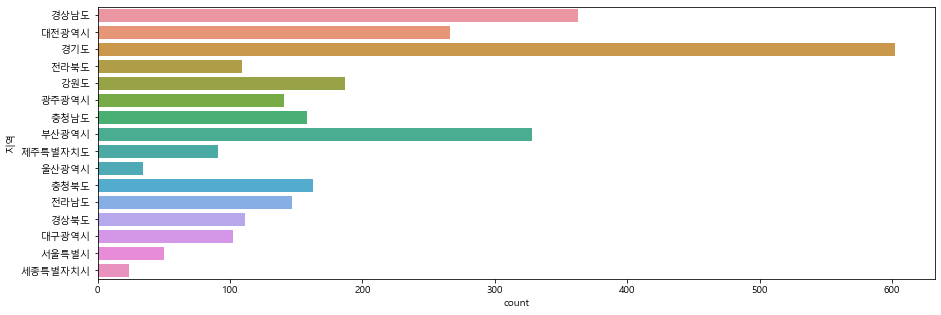

In [20]:
sns.countplot(y = '지역', data = train_df)

<AxesSubplot:xlabel='count', ylabel='지역'>

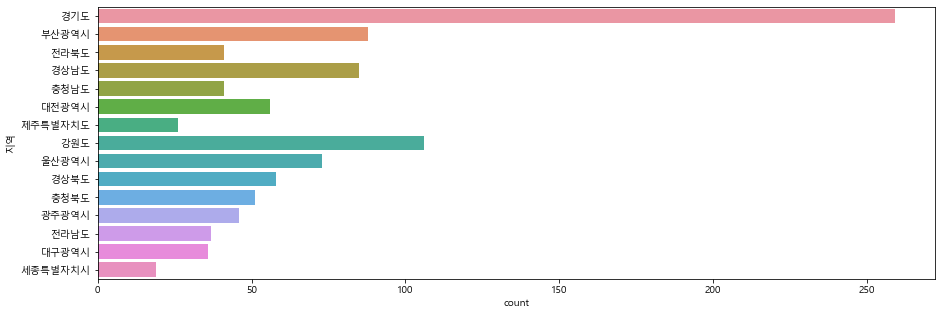

In [21]:
sns.countplot(y = '지역', data = test_df)

어느 지역이 가장 많은지 살펴보았다

train과 test모두 경기도가 가장 많고 세종시가 가장 적다. 

그런데 test세트에는 서울이 없다. 그래서 가장 가까운 경기도 안에 서울을 포함시켰다.

In [22]:
train_df['지역'] = train_df['지역'].replace('서울특별시','경기도')

<AxesSubplot:xlabel='공급유형', ylabel='count'>

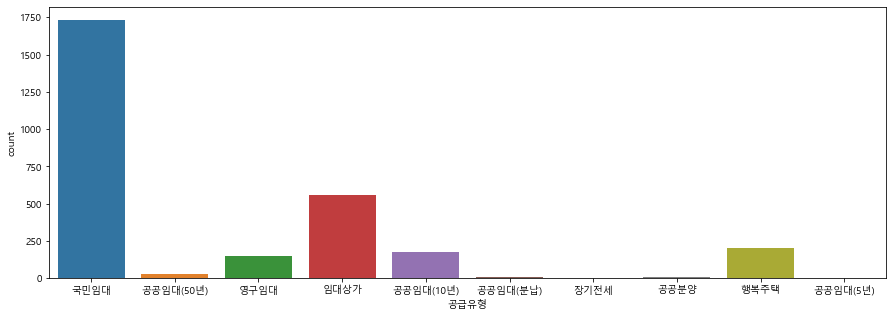

In [23]:
sns.countplot(x= '공급유형', data = train_df)

<AxesSubplot:xlabel='공급유형', ylabel='count'>

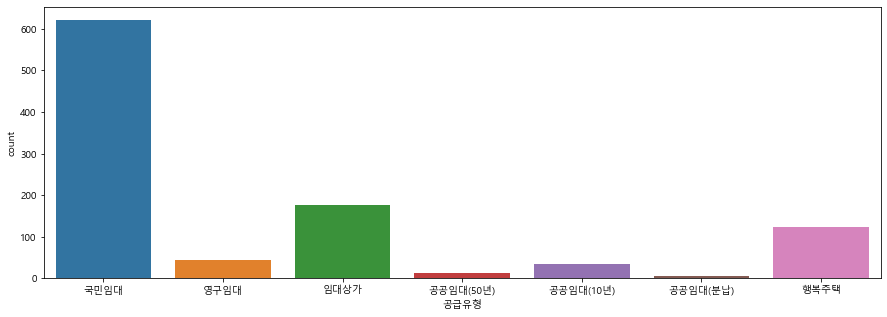

In [24]:
sns.countplot(x= '공급유형', data = test_df)

분포가 test와 train이 비슷하다. 국민임대 임대상가 행복주택 순으로 많다.

test데이터에는 장기전세 공공분양 공공임대(5년)이 없다.

test데이터에는 없는 것들은 train데이터에서 다른데이터랑 합치기로했다.

장기전세와 공공분양은 국민임대로 묶고(가장 비슷한 유형같아서) 공공임대(5)년은 공공임대(10)년에 포함시켰다.

In [25]:
train_df['공급유형'] = train_df['공급유형'].replace('장기전세','국민임대')
train_df['공급유형'] = train_df['공급유형'].replace('공공분양','국민임대')
train_df['공급유형'] = train_df['공급유형'].replace('공공임대(5년)','공공임대(10년)')

<AxesSubplot:xlabel='자격유형', ylabel='count'>

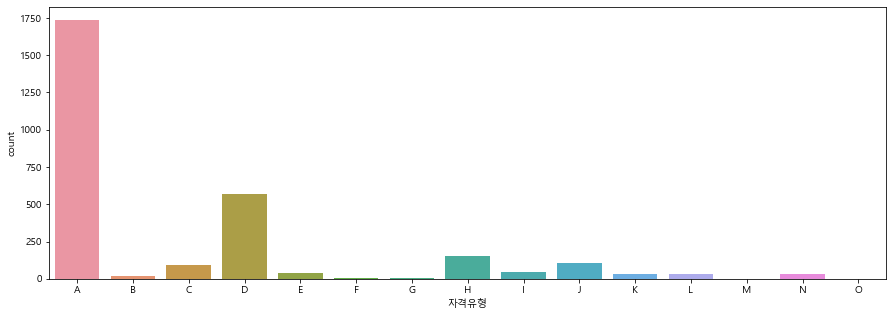

In [26]:
sns.countplot(x= '자격유형', data = train_df)

<AxesSubplot:xlabel='자격유형', ylabel='count'>

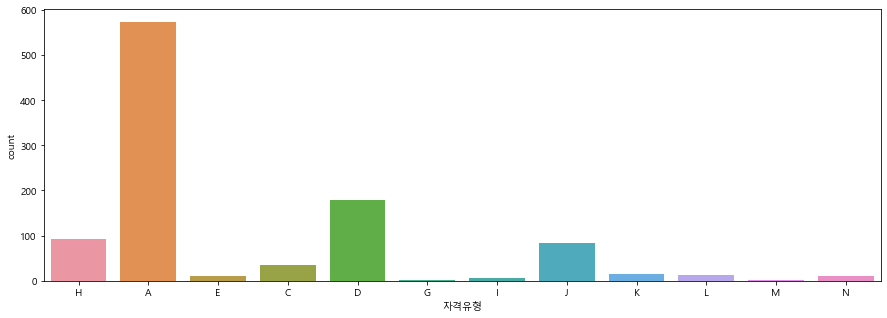

In [27]:
sns.countplot(x= '자격유형', data = test_df)

test데이터에는 공급유형의 B,F,O가 없다

자격 유형은 단지코드를 확인해서 그 공급유형에 맞는 자격유형으로 대체해주었다. (생략)

train데이터의 B는 A로, F는 C로, O는 J로 바꿔주자

In [28]:
# 자격유형 변환
train_df['자격유형'] = train_df['자격유형'].replace('B','A')
train_df['자격유형'] = train_df['자격유형'].replace('F','C')
train_df['자격유형'] = train_df['자격유형'].replace('O','J')

<AxesSubplot:xlabel='공급유형', ylabel='전용면적'>

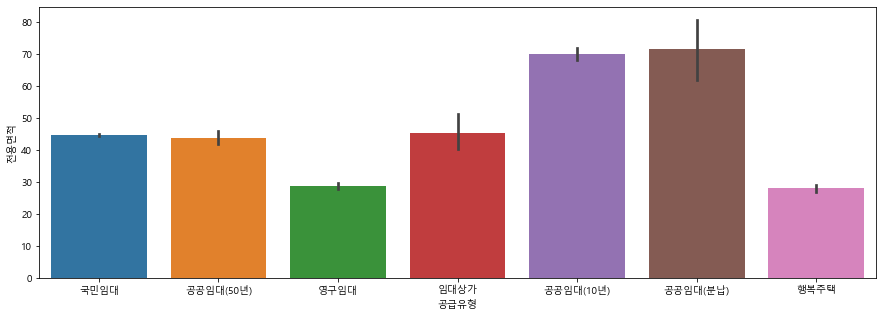

In [29]:
sns.barplot(x = '공급유형', y = '전용면적', data = train_df)

<AxesSubplot:xlabel='공급유형', ylabel='전용면적'>

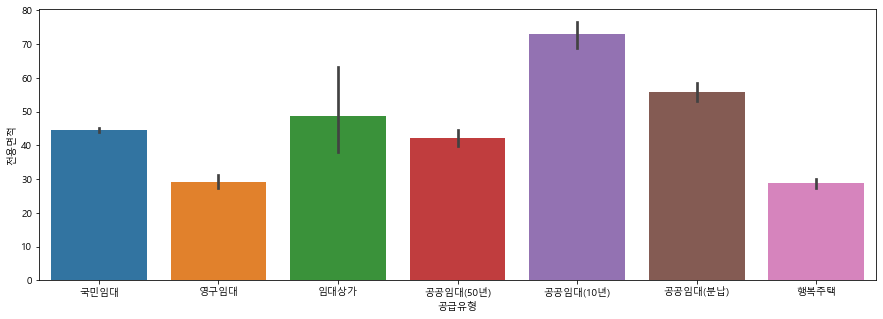

In [30]:
sns.barplot(x = '공급유형', y = '전용면적', data = test_df)

공급유형은 차이가 없다

<AxesSubplot:xlabel='도보 10분거리 내 버스정류장 수', ylabel='count'>

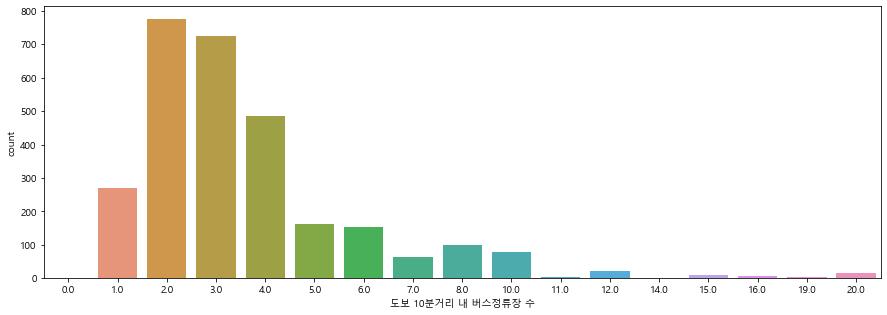

In [31]:
sns.countplot(x='도보 10분거리 내 버스정류장 수', data = train_df)

<AxesSubplot:xlabel='도보 10분거리 내 버스정류장 수', ylabel='count'>

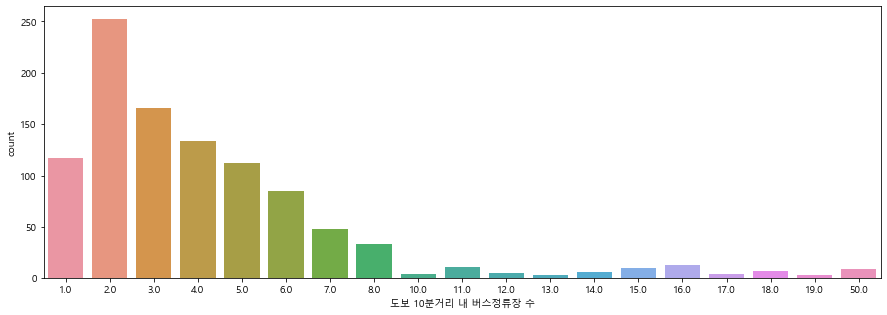

In [32]:
sns.countplot(x='도보 10분거리 내 버스정류장 수', data = test_df)

50개는 너무 많으니 train데이터의 최대값인 20개로 바꿔주자

In [33]:
test_df['도보 10분거리 내 버스정류장 수'] = test_df['도보 10분거리 내 버스정류장 수'].replace(50,20)

마지막으로 주변에 대중교통이 있으면 주차수가 적을것 같다고 생각해서 관계를 살펴보았다

<AxesSubplot:xlabel='도보 10분거리 내 지하철역 수(환승노선 수 반영)', ylabel='등록차량수'>

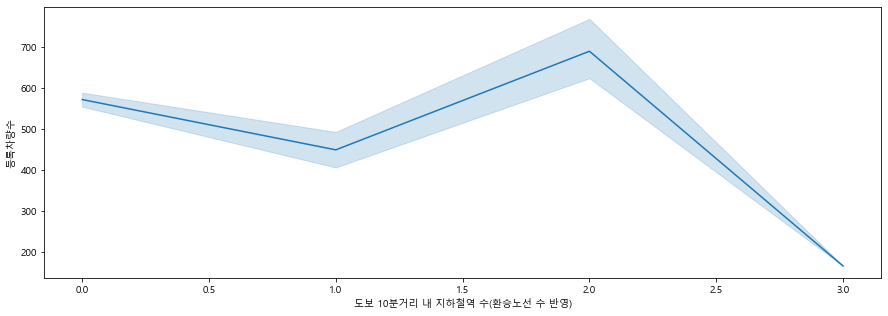

In [34]:
sns.lineplot(x='도보 10분거리 내 지하철역 수(환승노선 수 반영)', y = '등록차량수', data=train_df)

<AxesSubplot:xlabel='도보 10분거리 내 버스정류장 수', ylabel='등록차량수'>

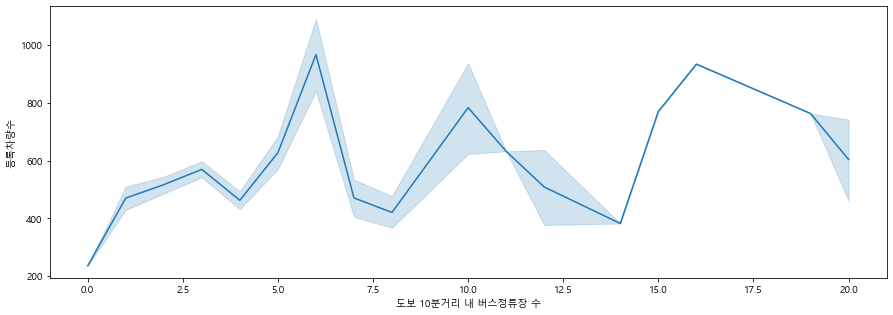

In [35]:
sns.lineplot(x='도보 10분거리 내 버스정류장 수', y = '등록차량수', data=train_df)

근처에 대중교통이 있어도 크게 연관있어보이지는 않는다

# 전처리

광역시 특별시를 하나로 묶어주었다 

이유는 주차법 관련해서 기준이 특별시와 광역시가 다르기 때문이다 (코드공유 참고)

In [36]:
#광역시끼리  묶어주기
train_df['지역'] = train_df['지역'].replace('대전광역시','광역시')
train_df['지역'] = train_df['지역'].replace('광주광역시','광역시')
train_df['지역'] = train_df['지역'].replace('울산광역시','광역시')
train_df['지역'] = train_df['지역'].replace('대구광역시','광역시')
train_df['지역'] = train_df['지역'].replace('부산광역시','광역시')

#특별시끼리 묶어주기
train_df['지역'] = train_df['지역'].replace('서울특별시','특별시')
train_df['지역'] = train_df['지역'].replace('제주특별자치도','특별시')
train_df['지역'] = train_df['지역'].replace('세종특별자치시','광역시')

#광역시끼리  묶어주기
test_df['지역'] = test_df['지역'].replace('대전광역시','광역시')
test_df['지역'] = test_df['지역'].replace('광주광역시','광역시')
test_df['지역'] = test_df['지역'].replace('울산광역시','광역시')
test_df['지역'] = test_df['지역'].replace('대구광역시','광역시')
test_df['지역'] = test_df['지역'].replace('부산광역시','광역시')

#특별시끼리 묶어주기
test_df['지역'] = test_df['지역'].replace('제주특별자치도','특별시')
test_df['지역'] = test_df['지역'].replace('세종특별자치시','광역시')

필요없는 데이터는 제거해주었다.

In [37]:
train_df.drop('단지코드', axis=1, inplace=True)
test_df.drop('단지코드', axis=1, inplace=True)

또한 데이터를 살펴본 결과 모두 문포가 넓고 꼬리가 길기 때문에 log변환을 해줘야겠다고 생각했다

In [38]:
train_df['총세대수'] = np.log1p(train_df['총세대수']) 
train_df['전용면적'] = np.log1p(train_df['전용면적']) 
train_df['전용면적별세대수'] = np.log1p(train_df['전용면적별세대수']) 
train_df['임대보증금'] = np.log1p(train_df['임대보증금']) 
train_df['임대료'] = np.log1p(train_df['임대료']) 
train_df['도보 10분거리 내 버스정류장 수'] = np.log1p(train_df['도보 10분거리 내 버스정류장 수']) 
train_df['공가수'] = np.log1p(train_df['공가수']) 
train_df['단지내주차면수'] = np.log1p(train_df['단지내주차면수']) 

test_df['총세대수'] = np.log1p(test_df['총세대수']) 
test_df['전용면적'] = np.log1p(test_df['전용면적']) 
test_df['전용면적별세대수'] = np.log1p(test_df['전용면적별세대수']) 
test_df['임대보증금'] = np.log1p(test_df['임대보증금']) 
test_df['임대료'] = np.log1p(test_df['임대료']) 
test_df['도보 10분거리 내 버스정류장 수'] = np.log1p(test_df['도보 10분거리 내 버스정류장 수']) 
test_df['공가수'] = np.log1p(test_df['공가수']) 
test_df['단지내주차면수'] = np.log1p(test_df['단지내주차면수']) 

지하철은 데이터가 0,1,2,3 4개라서 원핫인코딩하기 쉽게 문자형으로 바꿔줄것이다

In [39]:
train_df['도보 10분거리 내 지하철역 수(환승노선 수 반영)'] = train_df['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].replace(3,2)
train_df['도보 10분거리 내 지하철역 수(환승노선 수 반영)'] = train_df['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].astype(object)
test_df['도보 10분거리 내 지하철역 수(환승노선 수 반영)'] = test_df['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].astype(object)

원핫인코딩 해주자

In [40]:
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)

C:\Users\lmj\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
C:\Users\lmj\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


# 모델링 (pycaret)

In [41]:
from pycaret.regression import *

clf = setup(train_df, target = '등록차량수')

,Description,Value
0,session_id,7658
1,Target,등록차량수
2,Original Data,"(2876, 43)"
3,Missing Values,0
4,Numeric Features,42
5,Categorical Features,0
6,Ordinal Features,0
7,High Cardinality Features,0
8,High Cardinality Method,None
9,Transformed Train Set,"(2013, 40)"


In [44]:
# 모델 비교하기
best5=compare_models(fold=5, sort='MAE', n_select=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,13.5301,2085.4057,43.9952,0.9895,0.1129,0.0402,0.2200
dt,Decision Tree Regressor,18.4344,4332.4330,65.6720,0.9781,0.1543,0.0497,0.0140
xgboost,Extreme Gradient Boosting,28.8007,3240.9553,56.0991,0.9836,0.1417,0.0762,0.2760
rf,Random Forest Regressor,29.5158,3553.5034,58.8268,0.9821,0.1426,0.0745,0.3180
lightgbm,Light Gradient Boosting Machine,39.9880,4577.3971,67.2641,0.9768,0.1786,0.1141,0.1280
gbr,Gradient Boosting Regressor,74.2295,11230.5008,105.6085,0.9432,0.2651,0.2122,0.1340
knn,K Neighbors Regressor,105.8606,29748.5383,172.3840,0.8494,0.3127,0.2418,0.0160
ada,AdaBoost Regressor,143.8420,29319.9340,171.1503,0.8518,0.5710,0.6562,0.1120
lr,Linear Regression,158.7918,52519.4016,228.8282,0.7357,0.6728,0.6907,0.0100
br,Bayesian Ridge,159.3230,52711.3047,229.2181,0.7348,0.6727,0.6914,0.0120


모델을 비교해보았다 이제 상위5개의 모델을 생성한 뒤 파라미터 튜닝을 해주자

In [46]:
best_tune = tune_model(best5)

ValueError: Estimator [ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=7658, verbose=0, warm_start=False), DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=7658, splitter='best'), XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-1,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=7658, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='auto',
             validate_parameters=1, verbosity=0), RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=7658, verbose=0, warm_start=False), LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=7658, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)] does not have the required fit() method.

저렇게 하면 하이퍼파라미터 튜닝이 가능한데 무슨오류인지 안된다.. 그래서 for 문을 이용해서 튜닝해주었다

In [47]:
tuned_best5 = [tune_model(i) for i in best5]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,42.7425,5059.6291,71.1311,0.9713,0.1689,0.1023
1,43.1779,5975.9816,77.3045,0.9704,0.2051,0.1224
2,35.9679,3893.5271,62.3981,0.9807,0.1718,0.0944
3,40.5756,5797.2228,76.1395,0.9747,0.2206,0.1401
4,35.2399,4120.3870,64.1902,0.9750,0.2332,0.1387
5,33.9581,2837.3166,53.2665,0.9853,0.1284,0.0826
6,38.4752,4053.1043,63.6640,0.9799,0.1505,0.0894
7,33.6235,3613.7278,60.1143,0.9795,0.1820,0.1028
8,29.8580,2058.3616,45.3692,0.9896,0.1251,0.0769


튜닝이 끝났으니 모델을 블렌딩해주자

In [48]:
best_blend = blend_models(estimator_list= tuned_best5, fold=5, optimize='MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,42.6007,6042.4533,77.7332,0.9681,0.1911,0.1121
1,38.4029,5320.5478,72.9421,0.9754,0.1826,0.1056
2,34.8319,3571.5058,59.7621,0.9800,0.1708,0.0994
3,33.8209,3471.9304,58.9231,0.9816,0.1350,0.0788
4,37.3562,4091.2911,63.9632,0.9814,0.1217,0.0787
Mean,37.4025,4499.5457,66.6647,0.9773,0.1602,0.0949
Std,3.0809,1013.7585,7.4404,0.0051,0.0271,0.0138


모델을 finalized

In [49]:
final_model = finalize_model(best_blend)

최종 모델로 예측하기

In [50]:
pred = predict_model(final_model, test_df)

모델 시각화

In [54]:
pred

,총세대수,전용면적,전용면적별세대수,공가수,임대보증금,임대료,도보 10분거리 내 버스정류장 수,단지내주차면수,임대건물구분_상가,임대건물구분_아파트,...,자격유형_I,자격유형_J,자격유형_K,자격유형_L,자격유형_M,자격유형_N,도보 10분거리 내 지하철역 수(환승노선 수 반영)_0.0,도보 10분거리 내 지하철역 수(환승노선 수 반영)_1.0,도보 10분거리 내 지하철역 수(환승노선 수 반영)_2.0,Label
0,6.626718,3.708437,4.762174,2.708050,16.943586,12.153942,1.098612,6.527958,0,1,...,0,0,0,0,0,0,1,0,0,688.644806
1,6.626718,3.867235,3.433987,2.708050,17.400362,12.428940,1.098612,6.527958,0,1,...,0,0,0,0,0,0,1,0,0,706.883705
2,6.626718,3.869116,4.727388,2.708050,17.400362,12.428940,1.098612,6.527958,0,1,...,0,0,0,0,0,0,1,0,0,691.260764
3,6.626718,3.869116,4.795791,2.708050,17.400362,12.428940,1.098612,6.527958,0,1,...,0,0,0,0,0,0,1,0,0,689.305466
4,6.626718,3.960051,4.110874,2.708050,17.588203,12.600750,1.098612,6.527958,0,1,...,0,0,0,0,0,0,1,0,0,680.897914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,6.516193,3.631515,4.844187,3.663562,16.835534,11.886263,0.693147,6.148468,0,1,...,0,0,0,1,0,0,1,0,0,429.957901
1018,5.948035,3.407511,4.574711,3.828641,15.742966,11.574970,1.098612,5.707110,0,1,...,0,0,0,0,0,0,1,0,0,237.391255
1019,5.948035,3.407511,3.044522,3.828641,15.742966,11.574970,1.098612,5.707110,0,1,...,0,0,0,0,0,0,1,0,0,237.609170
1020,5.948035,3.700067,5.313206,3.828641,16.411511,11.881734,1.098612,5.707110,0,1,...,0,0,0,0,0,0,1,0,0,240.625439


In [55]:
sub = pd.read_csv('sample_submission.csv')

In [57]:
sub['num'] = pred['Label']

In [59]:
sub.to_csv('1.csv', index = False)

제출 결과 public 388 private 422 점으로 550등 .. ㅜㅜ